In [10]:
import os

import matplotlib.pyplot as plt
import numpy as np

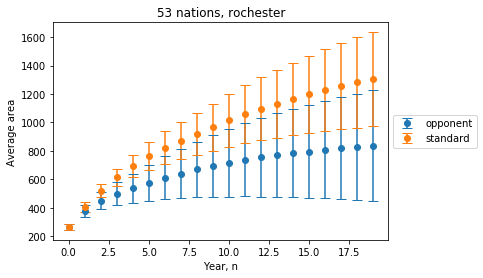

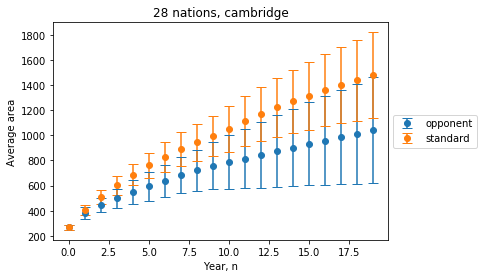

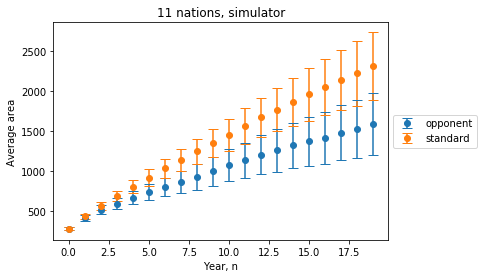

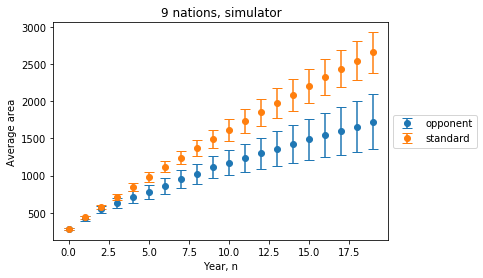

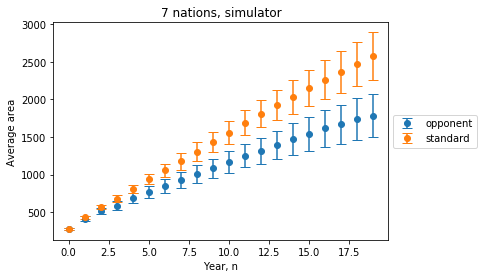

In [12]:
dynamic_areas = {}
static_areas = {}

runs = [(53,'rochester','static'),(28,'cambridge','static'),(11,'simulator','static'),(9,'simulator','static'),(7,'simulator','static')]

years = 20

for num_civs,backend,opponent in runs:
    
    samples = []
    folders = [info for info in os.fwalk('maps')][0][1]
    for folder in folders:
        (n,b,o,t) = folder.split('_')
        if n==str(num_civs) and b==backend and o==opponent:
            samples.append(folder)
        num_samples = len(samples)
        
    dynamic_areas[num_civs,backend] = [[] for year in range(years)]
    static_areas[num_civs,backend] = [[] for year in range(years)]
    for sample in samples:

        with open('maps/'+sample+'/data.txt', 'r') as file:
            data = file.readlines()

            opponent = eval(data[-1])['opponent']
            for year, dump in enumerate(data):
                if year<years:
                    dump = eval(dump)
                    area = dump['area']
                    opponent = dump['opponent']

                    for civ in area:
                        if civ in opponent:
                            static_areas[num_civs,backend][year].append(area[civ])
                        else:
                            dynamic_areas[num_civs,backend][year].append(area[civ])
                
for num_civs,backend,opponent in runs:
    ax = plt.gca()
    plt.title(str(num_civs) + ' nations, ' +backend)
    plt.xlabel('Year, n')
    plt.ylabel('Average area')
    
    y_static = [np.mean(static_areas[num_civs,backend][year]) for year in range(years)]
    yerr_static = [np.std(static_areas[num_civs,backend][year])/2 for year in range(years)]
    y_dynamic = [np.mean(dynamic_areas[num_civs,backend][year]) for year in range(years)]
    yerr_dynamic = [np.std(dynamic_areas[num_civs,backend][year])/2 for year in range(years)]
    
    ax.errorbar( range(years), y_static, yerr=yerr_static, label='opponent', fmt='o', capsize=5)
    ax.errorbar( range(years), y_dynamic, yerr=yerr_dynamic, label='standard', fmt='o', capsize=5)
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.show()

In [67]:

war = {}


for num_civs,backend,opponent in runs:

    samples = []
    folders = [info for info in os.fwalk('maps')][0][1]
    for folder in folders:
        (n,b,o,t) = folder.split('_')
        if n==str(num_civs) and b==backend and o==opponent:
            samples.append(folder)
        num_samples = len(samples)
        
    sames[num_civs,backend] = [[] for year in range(delta,20)]
    war[num_civs,backend] = [0,0,0]
    for sample in samples:
        
        entangled = []

        with open('maps/'+sample+'/data.txt', 'r') as file:
            data = file.readlines()
            
            moves = []
            transfers = []
            for dump in data:
                dump = eval(dump)
                moves.append(dump['moves'])
                transfers.append(dump['transfers'])

            for year in range(19):
                for loser in transfers[year]:
                    winner = transfers[year][loser]
                    
                    if loser not in entangled and winner not in entangled:
                        war[num_civs,backend][0] += (moves[year-1][loser][1]==winner)
                        war[num_civs,backend][1] += (moves[year][loser][1]==winner)
                        war[num_civs,backend][2] += 1
                    entangled += [loser, winner]

IndexError: list index out of range

In [63]:
war

{(5, 'simulator'): [5, 6, 6]}